# **IoT Symmetry Dataset:**


Question 1: Anomaly Detection

Question 2: Predict Smoke Levels

Question 3: Cluster Devices by Sensor Patterns

Question 4: Factors Influencing Motion Detection

Question 5: Predict Temperature based on Environment


For Dataset :[Link](https://docs.google.com/spreadsheets/d/1yaP5ik3tov0PeT3C-saDp7q1sjhKk2Lz0kDCtkPktAc/edit?usp=sharing)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/iot_telemetry_data - iot_telemetry_data.csv'

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv(file_path)
data

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
...,...,...,...,...,...,...,...,...,...
405179,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405180,1.600000e+09,b8:27:eb:bf:9d:51,0.005882,48.500000,False,0.008660,False,0.023301,22.200000
405181,1.600000e+09,1c:bf:ce:15:ec:4d,0.004540,75.699997,True,0.007181,False,0.019076,26.600000
405182,1.600000e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [4]:
data.isnull().sum()

,0
ts,0
device,0
co,0
humidity,0
light,0
lpg,0
motion,0
smoke,0
temp,0


In [5]:
data['ts'] = pd.to_datetime(data['ts'], unit='s')
data['ts']

,ts
0,2020-05-20 18:40:00
1,2020-05-20 18:40:00
2,2020-05-20 18:40:00
3,2020-05-20 18:40:00
4,2020-05-20 18:40:00
...,...
405179,2020-09-13 12:26:40
405180,2020-09-13 12:26:40
405181,2020-09-13 12:26:40
405182,2020-09-13 12:26:40


In [6]:
data['device'] = data['device'].astype('category').cat.codes
data['device']

,device
0,2
1,0
2,2
3,1
4,2
...,...
405179,0
405180,2
405181,1
405182,0


In [7]:
data['motion'] = data['motion'].astype('int')
data['light'] = data['light'].astype('int')

In [8]:
features = ["co", "humidity", "lpg", "smoke", "temp","light", "motion"]

X = data[features]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=200,
    contamination=0.01,
    random_state=42,
    n_jobs=-1
)

data["anomaly"] = iso.fit_predict(X_scaled)


In [11]:
data["anomaly_flag"] = (data["anomaly"] == -1).astype(int)


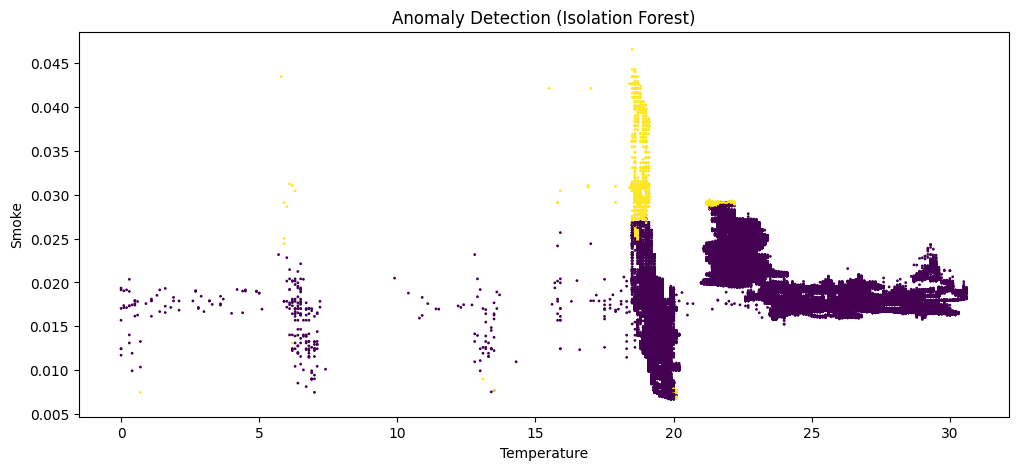

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.scatter(data["temp"], data["smoke"], c=data["anomaly_flag"], s=1)
plt.xlabel("Temperature")
plt.ylabel("Smoke")
plt.title("Anomaly Detection (Isolation Forest)")
plt.show()


In [13]:
normal_data = data[data['anomaly']==1].copy()

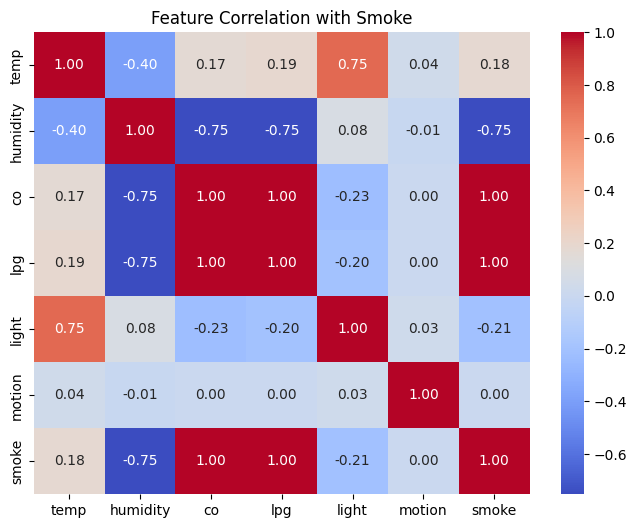

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["temp", "humidity", "co", "lpg", "light", "motion", "smoke"]

corr = normal_data[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Smoke")
plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor

features = ["temp", "humidity", "co", "lpg", "light", "motion"]
X = normal_data[features]
y = normal_data["smoke"]

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X, y)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [16]:
import pandas as pd

importance = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

importance

,0
lpg,5.265963e-01
co,4.734037e-01
temp,1.277949e-09
humidity,6.832617e-10
light,3.565337e-10
motion,5.727615e-13


In [17]:
X = normal_data[["co", "lpg"]]
y = normal_data["smoke"]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, name):
    print(f"\n{name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")



Linear Regression
MAE : 8.79891937583852e-07
RMSE: 1.3215186407952312e-06
R²  : 0.9999998823127156

Random Forest
MAE : 1.2502455496156283e-06
RMSE: 2.210865053063353e-06
R²  : 0.9999996706122646


In [22]:
features = ["co", "lpg", "smoke", "temp", "humidity"]
X = normal_data[features]

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    random_state=42
)

normal_data["cluster"] = kmeans.fit_predict(X_scaled)

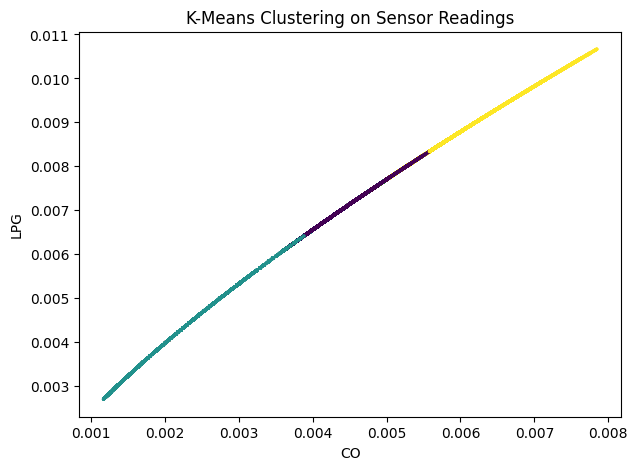

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(
    normal_data["co"],
    normal_data["lpg"],
    c=normal_data["cluster"],
    s=2
)
plt.xlabel("CO")
plt.ylabel("LPG")
plt.title("K-Means Clustering on Sensor Readings")
plt.show()


In [26]:
from sklearn.ensemble import RandomForestRegressor

features = ["humidity", "co", "lpg", "light", "motion","smoke"]
X = normal_data[features]
y = normal_data["temp"]

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X, y)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [27]:
import pandas as pd

importance = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

importance

,0
light,0.584993
humidity,0.298003
lpg,0.044094
smoke,0.036535
co,0.036238
motion,0.000137


In [28]:
X_tem = normal_data[["light", "humidity","lpg","smoke","co"]]
y_tem = normal_data["temp"]


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tem, y_tem, test_size=0.2, random_state=42)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, name):
    print(f"\n{name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")



Linear Regression
MAE : 0.7200369508047605
RMSE: 1.241122768514463
R²  : 0.7862297880336162

Random Forest
MAE : 0.35737480301888136
RMSE: 0.6935828119179199
R²  : 0.9332403046226316


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, name):
    print(f"\n{name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf2, "Random Forest")



Linear Regression
MAE : 0.7200369508047605
RMSE: 1.241122768514463
R²  : 0.7862297880336162

Random Forest
MAE : 0.3000074829959003
RMSE: 0.6410954741115371
R²  : 0.9429621529824569
